<a href="https://colab.research.google.com/github/minseokey/Data_Science/blob/main/DataScience09_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

train = pd.read_csv("/content/gdrive/My Drive/ml-100k/ml-100k/ua.base",sep ="\t",names=['user', 'movie', 'rating', 'timestamp'])

test = pd.read_csv("/content/gdrive/My Drive/ml-100k/ml-100k/ua.test", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])

In [ ]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

items

tensor([   1,    2,    3,  ..., 1188, 1228, 1330])

In [ ]:
rank = 15
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank,requires_grad = True)
Q = torch.randn(numUsers, rank, requires_grad = True)

P

tensor([[-0.5612, -0.6214, -1.3489,  ...,  1.1534,  0.5167, -1.6426],
        [ 0.5822,  0.2702,  0.6737,  ...,  0.0084, -0.7947,  0.4190],
        [ 1.1149,  0.3887,  0.1564,  ..., -0.6304, -0.0602, -0.9920],
        ...,
        [ 1.9175, -2.0427, -0.1187,  ...,  0.1769, -0.0141,  0.2505],
        [-1.3599, -1.3117,  0.3829,  ..., -0.9572,  0.0096,  2.1119],
        [ 0.7865,  0.9355, -0.7666,  ...,  0.0901,  0.9161, -1.9957]],
       requires_grad=True)

In [ ]:
# optimizer = torch.optim.Adam([P,Q],lr = 0.1)
# X = []
# Y = []
# for epoch in range(1000):
#   hypothesis = torch.sum(P[items]*Q[users],dim = 1)
#   cost = F.mse_loss(hypothesis,ratings)

#   optimizer.zero_grad()
#   cost.backward()
#   optimizer.step()

#   X.append(epoch)
#   Y.append(cost.item())

#   if epoch % 100 == 0:
#     print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))


In [ ]:
# plt.ylabel("MSE")
# plt.xlabel("Epoch")
# plt.plot(X,Y, c="blue", label="Training MSE")
# plt.legend()
# plt.show()


In [ ]:
optimizer = torch.optim.Adam([P,Q],lr = 0.1)
X = []
Y = []
Y_test = []
for epoch in range(1000):
  hypothesis = torch.sum(P[items]*Q[users],dim = 1)
  cost = F.mse_loss(hypothesis,ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  X.append(epoch)
  Y.append(cost.item())
  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test.item())


  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}, cost_test: {:.6f}" .format(epoch, cost.item(),cost_test.item()))


epoch: 0, cost: 28.765184, cost_test: 25.772005
epoch: 100, cost: 0.484921, cost_test: 2.017033
epoch: 200, cost: 0.402125, cost_test: 2.523036
epoch: 300, cost: 0.373891, cost_test: 3.037349
epoch: 400, cost: 0.360657, cost_test: 3.533766
epoch: 500, cost: 0.352935, cost_test: 4.051619
epoch: 600, cost: 0.347709, cost_test: 4.634455
epoch: 700, cost: 0.344001, cost_test: 5.239145
epoch: 800, cost: 0.341267, cost_test: 5.834822
epoch: 900, cost: 0.339086, cost_test: 6.478315


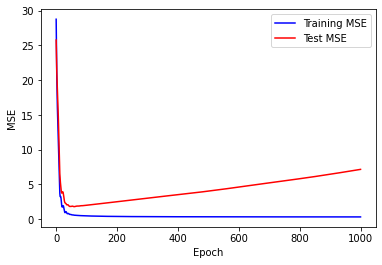

In [ ]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

In [ ]:
lambda1 = 0.0001
lambda2 = 0.0001
optimizer = torch.optim.Adam([P,Q],lr = 0.1)
X = []
Y = []
Y_test = []
for epoch in range(1000):
 hypothesis = torch.sum(P[items] * Q[users], dim=1)
 cost = F.mse_loss(hypothesis ,ratings)
 loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2)
 optimizer.zero_grad()
 loss.backward()
 optimizer.step()

 X.append(epoch)
 Y.append(cost.item())
 
 with torch.no_grad():
  hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
  cost_test = F.mse_loss(hypo_test, ratings_test)
  Y_test.append(cost_test.item())
 
 if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}, cost_test: {:.6f}" .format(epoch, cost.item(),cost_test.item()))


epoch: 0, cost: 28.907454
epoch: 100, cost: 0.637389
epoch: 200, cost: 0.577339
epoch: 300, cost: 0.566270
epoch: 400, cost: 0.561945
epoch: 500, cost: 0.559692
epoch: 600, cost: 0.558428
epoch: 700, cost: 0.557753
epoch: 800, cost: 0.557154
epoch: 900, cost: 0.556485


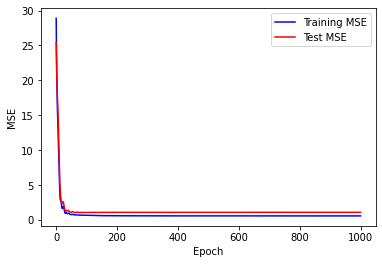

In [ ]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

In [ ]:
lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.0001
lambda4 = 0.0001
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()

optimizer = torch.optim.Adam([P,Q,bias_item,bias_user],lr = 0.1)
X = []
Y = []
Y_test = []

for epoch in range(1000):
 hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
 cost = F.mse_loss(hypothesis ,ratings)
 
 loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)
 
 optimizer.zero_grad()
 loss.backward()
 optimizer.step()
 
 X.append(epoch)
 Y.append(cost.item())
 
 with torch.no_grad():
  hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean + bias_item[items_test] + bias_user[users_test]
  cost_test = F.mse_loss(hypo_test, ratings_test)
  Y_test.append(cost_test.item())
 
 if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}, cost_test: {:.6f}" .format(epoch, cost.item(),cost_test.item()))

epoch: 0, cost: 18.161573, cost_test: 13.926003
epoch: 100, cost: 0.555528, cost_test: 0.884795
epoch: 200, cost: 0.520354, cost_test: 0.880566
epoch: 300, cost: 0.513699, cost_test: 0.877865
epoch: 400, cost: 0.511951, cost_test: 0.877465
epoch: 500, cost: 0.511368, cost_test: 0.877688
epoch: 600, cost: 0.510884, cost_test: 0.878224
epoch: 700, cost: 0.510488, cost_test: 0.878659
epoch: 800, cost: 0.510250, cost_test: 0.878775
epoch: 900, cost: 0.510114, cost_test: 0.878683


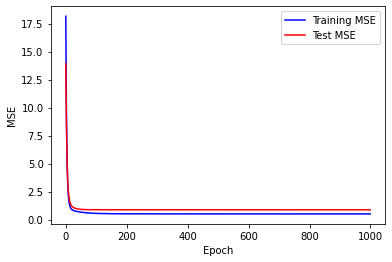

In [ ]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()